In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('./data/data.csv')
data.head()

,X1,X2,label
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


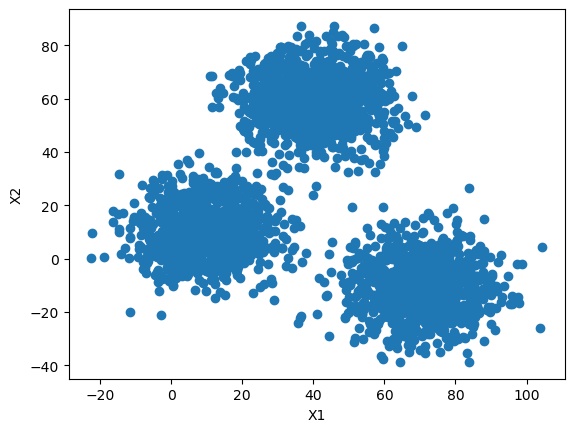

In [2]:
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:,'X1'],data.loc[:,'X2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
X = data.drop(['label'], axis=1)
y = data.loc[:, 'label']

pd.value_counts(y)

2    1156
1     954
0     890
Name: label, dtype: int64

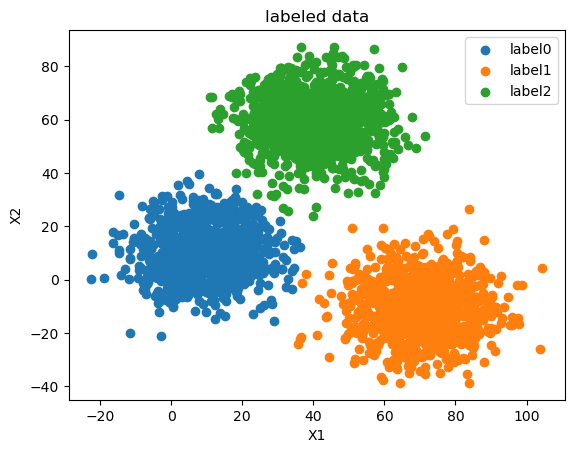

In [4]:
fig1 = plt.figure()
label0 = plt.scatter(data.loc[:,'X1'][y==0],data.loc[:,'X2'][y==0])
label1 = plt.scatter(data.loc[:,'X1'][y==1],data.loc[:,'X2'][y==1])
label2 = plt.scatter(data.loc[:,'X1'][y==2],data.loc[:,'X2'][y==2])

plt.title("labeled data")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()

In [5]:
from sklearn.cluster import MeanShift,estimate_bandwidth
#obtain the bandwidth
bw = estimate_bandwidth(X,n_samples=500)
print(bw)

ms = MeanShift(bandwidth=bw)
ms.fit(X)

30.84663454820215


MeanShift(bandwidth=30.84663454820215)

In [6]:
y_predict_ms = ms.predict(X)
print(pd.value_counts(y_predict_ms),pd.value_counts(y))

0    1149
1     952
2     899
dtype: int64 2    1156
1     954
0     890
Name: label, dtype: int64


In [7]:
centers = ms.cluster_centers_
print(centers)#meanshift聚类中心

[[ 40.60158864  59.65137971]
 [ 70.01854306 -10.11803404]
 [  9.56752568  10.79316266]]


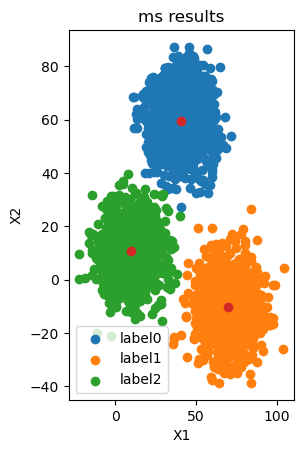

In [8]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'X1'][y_predict_ms==0],X.loc[:,'X2'][y_predict_ms==0])
label1 = plt.scatter(X.loc[:,'X1'][y_predict_ms==1],X.loc[:,'X2'][y_predict_ms==1])
label2 = plt.scatter(X.loc[:,'X1'][y_predict_ms==2],X.loc[:,'X2'][y_predict_ms==2])

plt.title("ms results")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

plt.show()

In [9]:
#correct the results
y_corrected_ms = []
for i in y_predict_ms:
    if i==0:
        y_corrected_ms.append(2)
    elif i==1:
        y_corrected_ms.append(1)
    else:
        y_corrected_ms.append(0)
print(pd.value_counts(y_corrected_ms),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: label, dtype: int64


In [10]:
y_corrected_ms = np.array(y_corrected_ms)
print(type(y_corrected_ms))

<class 'numpy.ndarray'>


In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_corrected_ms))

0.997
